In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kaggle dataset.csv', encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.shape

(5572, 5)

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.index = df.index + 1
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
5,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
unnecessary_columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns = unnecessary_columns, inplace = True)

In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
readable_columns = {"v1":"Label","v2":"Content"}
df.rename(columns = readable_columns,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.sample(5)

,Label,Content
2943,ham,No message..no responce..what happend?
4267,ham,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...
223,ham,"Sorry, I'll call later"
5322,ham,Ok no problem... Yup i'm going to sch at 4 if ...
5439,ham,"\What are youdoing later? Sar xxx\"""""


In [13]:
df.isnull().sum()

Label      0
Content    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5169 non-null   object
 1   Content  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [18]:
df.shape

(5169, 2)

In [19]:
# Preprocessing: Convert labels to binary (0 for ham, 1 for spam)
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'spam' else 0)

In [20]:
df.sample(5)

,Label,Content
4016,0,In which place i can get rooms cheap:-)
239,0,"New Theory: Argument wins d SITUATION, but los..."
1519,0,Shall i ask one thing if you dont mistake me.
3792,0,Love it! I want to flood that pretty pussy wit...
1640,1,FreeMsg:Feelin kinda lnly hope u like 2 keep m...


In [21]:
df.head()

,Label,Content
1,0,"Go until jurong point, crazy.. Available only ..."
2,0,Ok lar... Joking wif u oni...
3,1,Free entry in 2 a wkly comp to win FA Cup fina...
4,0,U dun say so early hor... U c already then say...
5,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
spam_count = (df['Label'] == 1).sum()
ham_count = (df['Label'] == 0).sum()

print(f"Total Spam Count: {spam_count}")
print(f"Total Ham Count: {ham_count}")

Total Spam Count: 653
Total Ham Count: 4516


In [23]:
df['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

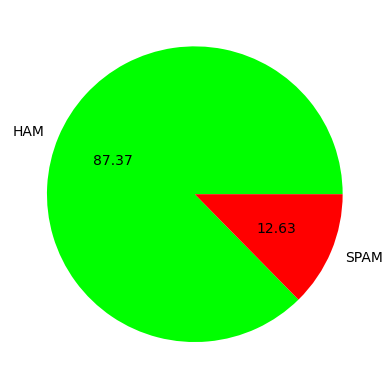

In [25]:
#autopct="%0.2f" shows %
colors = ['#00ff00', '#ff0000']
plt.pie(df['Label'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f", colors=colors)
plt.show()

In [26]:
#data is not balanced it leans towards ham

In [27]:
import nltk

In [28]:
!pip install nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['Sentence Count'] = df['Content'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['Word Count'] = df['Content'].apply(lambda x:len(nltk.word_tokenize(x)))
df['Character Count'] = df['Content'].apply(len)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 1 to 5572
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            5169 non-null   int64 
 1   Content          5169 non-null   object
 2   Sentence Count   5169 non-null   int64 
 3   Word Count       5169 non-null   int64 
 4   Character Count  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [32]:
df.sample(5)

,Label,Content,Sentence Count,Word Count,Character Count
3895,0,Yes. Last practice,2,4,19
1743,0,\EY! CALM DOWNON THEACUSATIONS.. ITXT U COS IW...,2,33,146
5532,0,Compliments to you. Was away from the system. ...,3,14,60
387,0,Customer place i will call you.,1,7,31
757,0,Cant think of anyone with * spare room off * t...,1,14,59


In [33]:
df[df['Label'] == 0][['Sentence Count','Word Count','Character Count']].describe()

,Sentence Count,Word Count,Character Count
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [34]:
df[df['Label'] == 1][['Sentence Count','Word Count','Character Count']].describe()

,Sentence Count,Word Count,Character Count
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [35]:
 df[['Sentence Count','Word Count','Character Count']].describe()

,Sentence Count,Word Count,Character Count
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


In [36]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['Label'] == 0]['Sentence Count'],color='#00ff00')
sns.histplot(df[df['Label'] == 1]['Sentence Count'],color='#ff0000')

<Axes: xlabel='Word Count', ylabel='Count'>

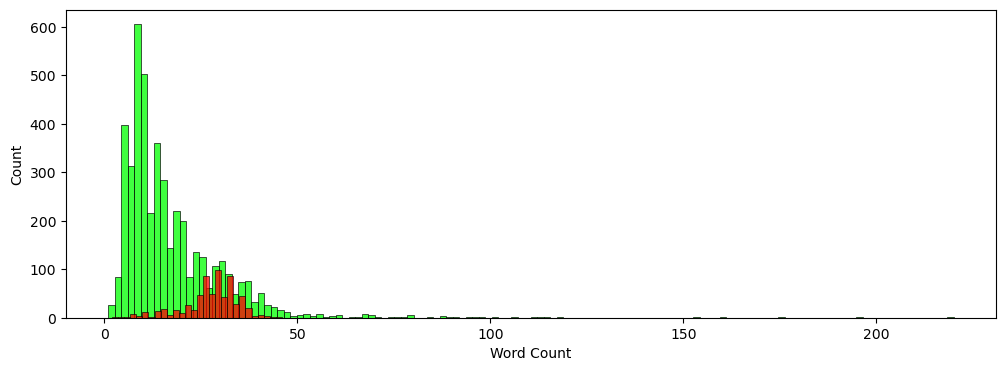

In [38]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['Label'] == 0]['Word Count'],color='#00ff00')
sns.histplot(df[df['Label'] == 1]['Word Count'],color='#ff0000')

<Axes: xlabel='Character Count', ylabel='Count'>

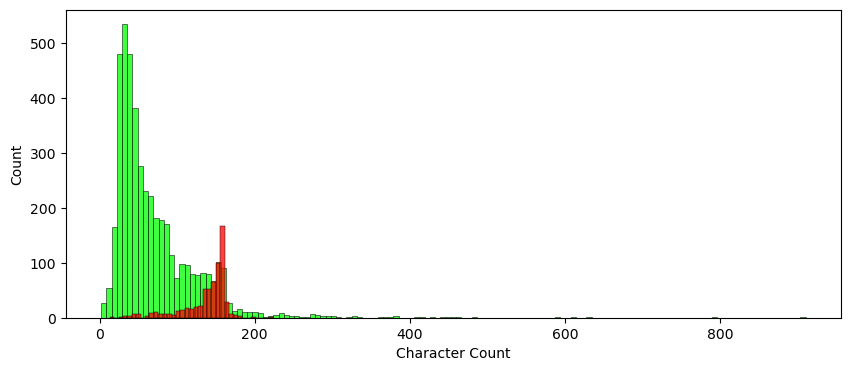

In [39]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Label'] == 0]['Character Count'],color='#00ff00')
sns.histplot(df[df['Label'] == 1]['Character Count'],color='#ff0000')

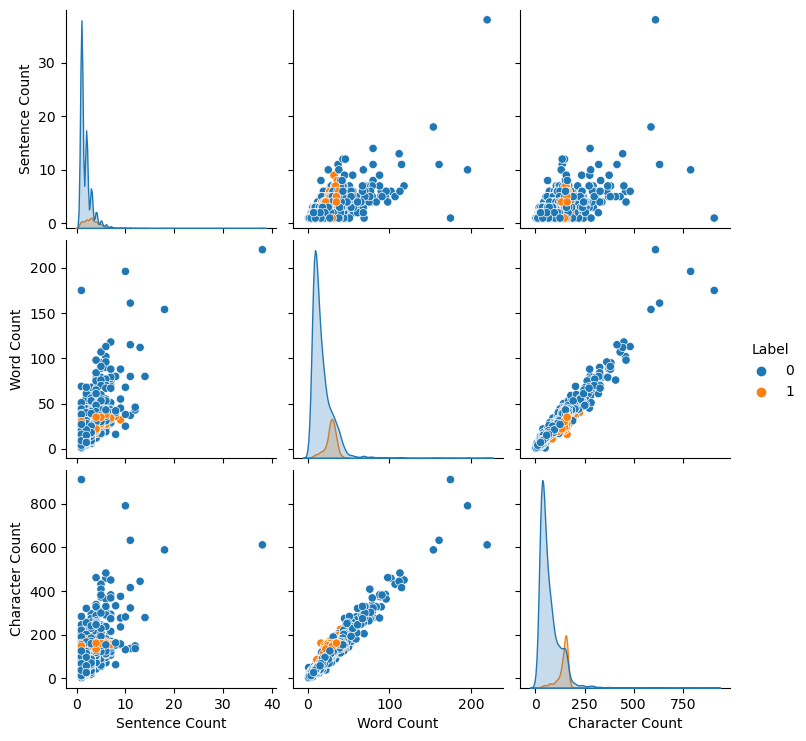

In [40]:
sns.pairplot(df,hue='Label')

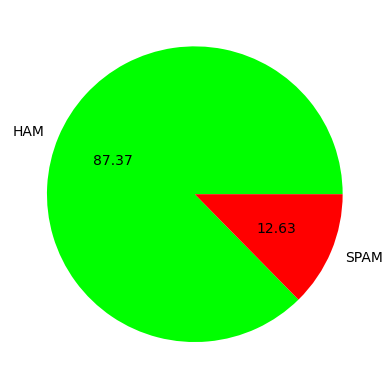

In [41]:
#autopct="%0.2f" shows %
colors = ['#00ff00', '#ff0000']
plt.pie(df['Label'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f", colors=colors)
plt.show()

In [42]:
# Separate the DataFrame into two groups based on the 'spam' column
df_0 = df[df['Label'] == 0] # The group with spam value 0
df_1 = df[df['Label'] == 1] # The group with spam value 1

# Find the number of rows in the smaller group
n = min(len(df_0), len(df_1))

# Sample n rows from the larger group without replacement
df_0_balanced = df_0.sample(n, replace=False)

# Concatenate the balanced group with the smaller group
df_balanced = pd.concat([df_0_balanced, df_1])
df = df_balanced
# Print the balanced DataFrame
print(df_balanced)

      Label                                            Content  \
285       0  Yeah I think my usual guy's still passed out f...   
3285      0  They are just making it easy to pay back. I ha...   
2685      0  Yupz... I've oredi booked slots 4 my weekends ...   
3700      0         Oh...i asked for fun. Haha...take care. Ì_   
999       0  Then Ì_ wait 4 me at bus stop aft ur lect lar....   
...     ...                                                ...   
5538      1  Want explicit SEX in 30 secs? Ring 02073162414...   
5541      1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...   
5548      1  Had your contract mobile 11 Mnths? Latest Moto...   
5567      1  REMINDER FROM O2: To get 2.50 pounds free call...   
5568      1  This is the 2nd time we have tried 2 contact u...   

      Sentence Count  Word Count  Character Count  
285                1          28              121  
3285               3          32              107  
2685               2          12               54  

In [43]:
df['Label'].value_counts()

Label
0    653
1    653
Name: count, dtype: int64

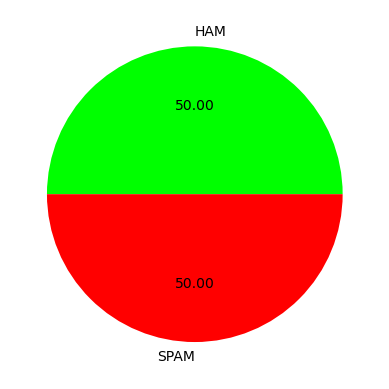

In [44]:
#autopct="%0.2f" shows %
colors = ['#00ff00', '#ff0000']
plt.pie(df['Label'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f", colors=colors)
plt.show()

In [45]:
#3

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mandi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [49]:
#Test
df['Content'][69]

'Did you hear about the new \\Divorce Barbie\\"? It comes with all of Ken\'s stuff!"'

In [50]:
transform_text(df['Content'][69])

'hear new come ken stuff'

In [51]:
df['Revised Content'] = df['Content'].apply(transform_text)

In [52]:
df.head(5)

,Label,Content,Sentence Count,Word Count,Character Count,Revised Content
285,0,Yeah I think my usual guy's still passed out f...,1,28,121,yeah think usual guy still pass last night get...
3285,0,They are just making it easy to pay back. I ha...,3,32,107,make easi pay back lt gt yr say pay back earli...
2685,0,Yupz... I've oredi booked slots 4 my weekends ...,2,12,54,yupz oredi book slot 4 weekend liao
3700,0,Oh...i asked for fun. Haha...take care. Ì_,3,13,42,oh ask fun haha take care
999,0,Then Ì_ wait 4 me at bus stop aft ur lect lar....,2,31,107,wait 4 bu stop aft ur lect lar dun c go get ca...


In [53]:
!pip3 install wordcloud

In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['Label'] == 1]['Revised Content'].str.cat(sep=" "))

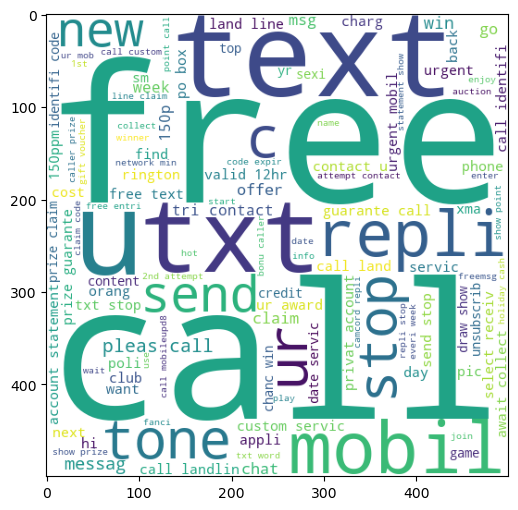

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
from collections import Counter

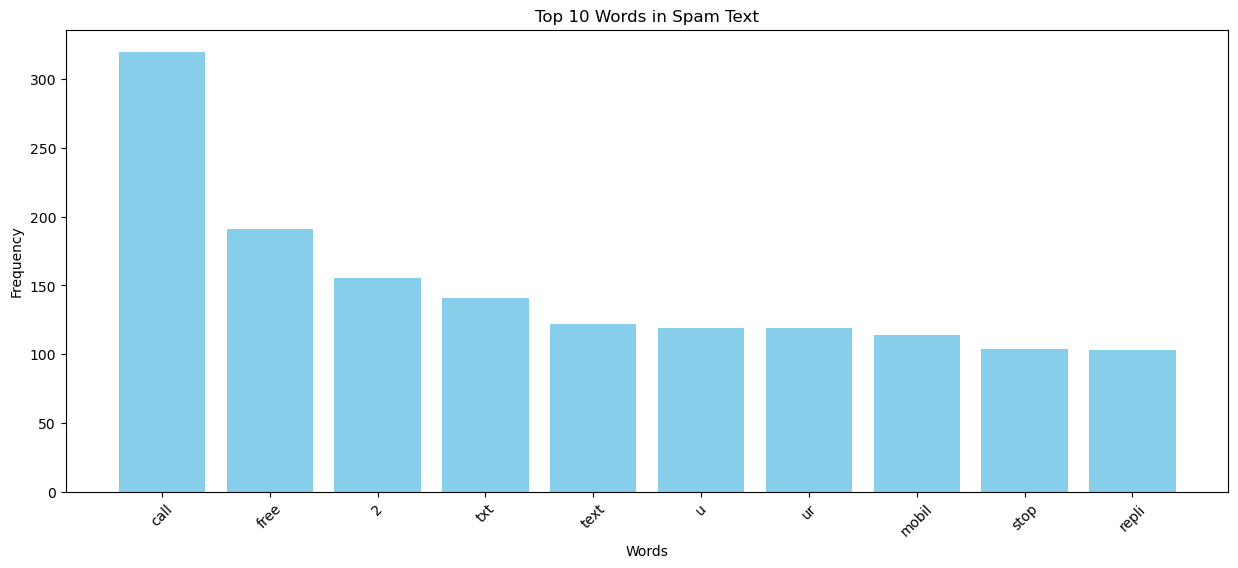

In [58]:
# Assuming 'df' is your DataFrame with 'transformed_text' column and 'target' column
spam_text = df[df['Label'] == 1]['Revised Content'].str.cat(sep=" ")

# Create a Counter object to count word frequencies
word_counts = Counter(spam_text.split())

# Get the most common words and their frequencies
top_words = word_counts.most_common(10)  # You can adjust the number based on your preference

# Extract words and frequencies for plotting
words, frequencies = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Spam Text')
plt.xticks(rotation=45)
plt.show()

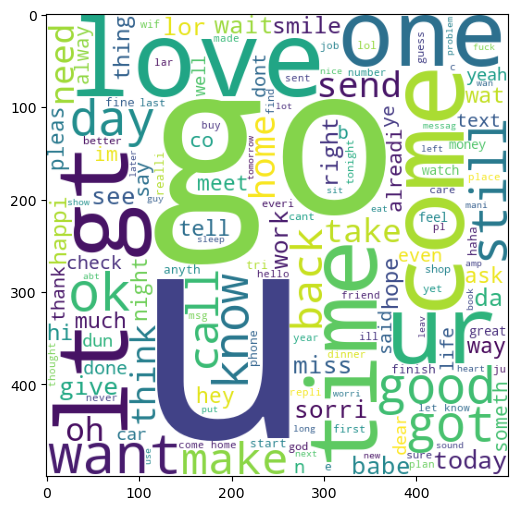

In [59]:
ham_wc = wc.generate(df[df['Label'] == 0]['Revised Content'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

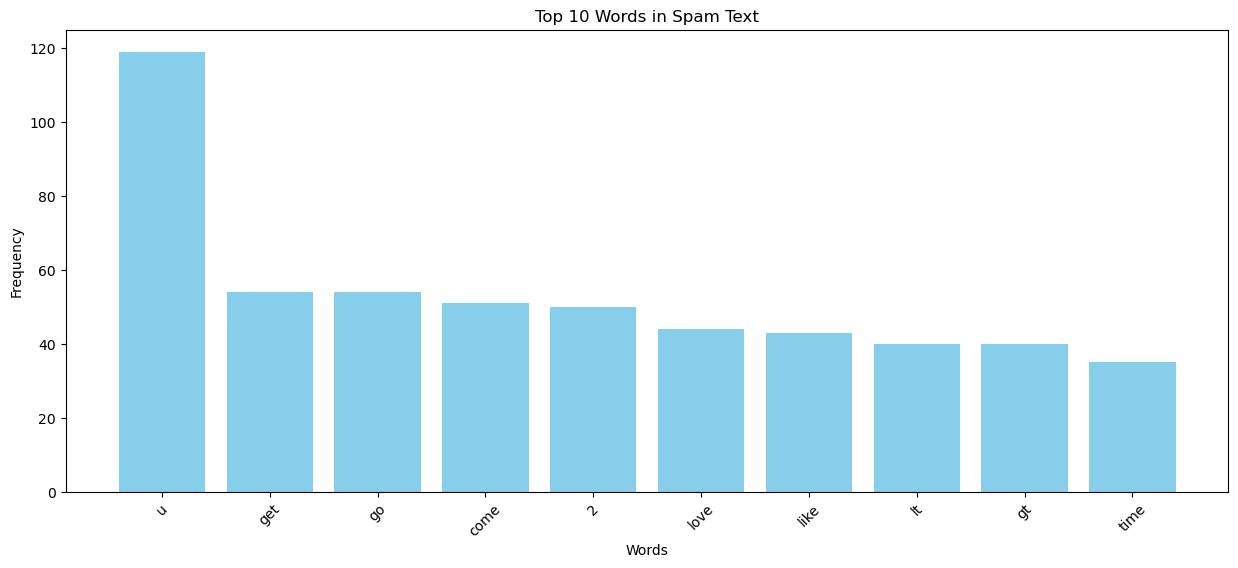

In [60]:
# Assuming 'df' is your DataFrame with 'transformed_text' column and 'target' column
ham_text = df[df['Label'] == 0]['Revised Content'].str.cat(sep=" ")

# Create a Counter object to count word frequencies
word_counts = Counter(ham_text.split())

# Get the most common words and their frequencies
top_words = word_counts.most_common(10)  # You can adjust the number based on your preference

# Extract words and frequencies for plotting
words, frequencies = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Spam Text')
plt.xticks(rotation=45)
plt.show()

In [61]:
#4

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3390)

In [63]:
X = tfidf.fit_transform(df['Revised Content']).toarray()

In [64]:
X.shape

(1306, 3390)

In [65]:
y = df['Label'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report

In [69]:
dt = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Decision Trees:
Accuracy: 0.8664122137404581
Precision: 0.944954128440367
Confusion Matrix:
[[124   6]
 [ 29 103]]

Classification Report for Decison Trees:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       130
           1       0.94      0.78      0.85       132

    accuracy                           0.87       262
   macro avg       0.88      0.87      0.87       262
weighted avg       0.88      0.87      0.87       262



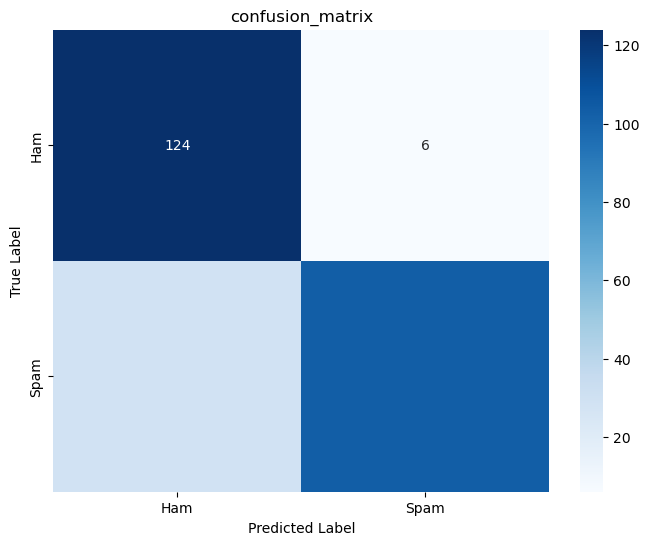

In [70]:
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test,y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print accuracy, precision, and confusion matrix for Decision Trees
print("Decision Trees:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Confusion Matrix:")
print(cm_dt)

# Generate classification report for Decison Trees
report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report for Decison Trees:\n", report_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('confusion_matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

K-Nearest Neighbors:
Accuracy: 0.916030534351145
Precision: 0.9741379310344828
Confusion Matrix:
[[127   3]
 [ 19 113]]

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       130
           1       0.97      0.86      0.91       132

    accuracy                           0.92       262
   macro avg       0.92      0.92      0.92       262
weighted avg       0.92      0.92      0.92       262



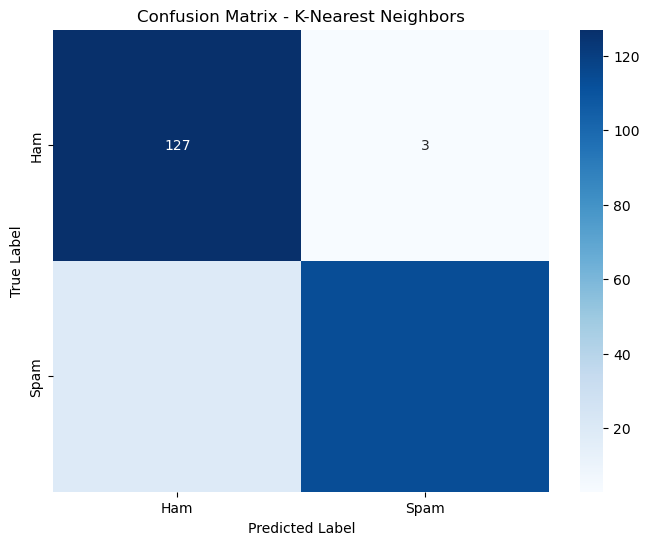

In [71]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


cm_knn = confusion_matrix(y_test, y_pred_knn)

print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Confusion Matrix:")
print(cm_knn)

report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report for K-Nearest Neighbors:\n", report_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Gaussian Naive Bayes:
Accuracy: 0.9274809160305344
Precision: 0.9312977099236641
Confusion Matrix:
[[121   9]
 [ 10 122]]

Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       130
           1       0.93      0.92      0.93       132

    accuracy                           0.93       262
   macro avg       0.93      0.93      0.93       262
weighted avg       0.93      0.93      0.93       262



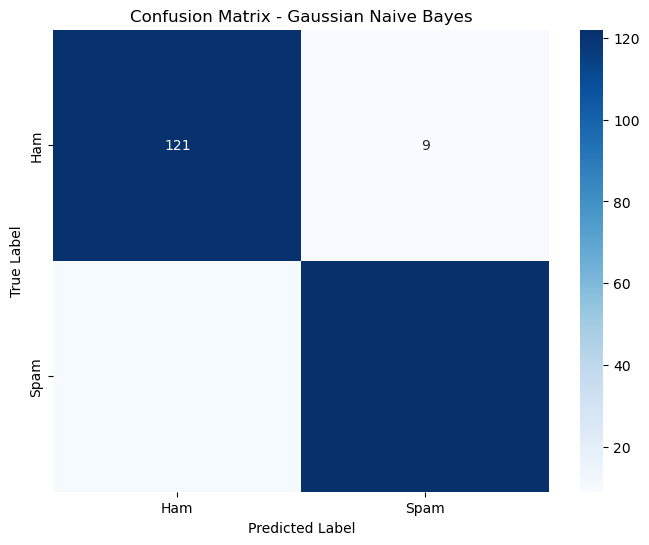

In [72]:
# Gaussian Naive Bayes (GNB)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)


cm_gnb = confusion_matrix(y_test, y_pred_gnb)

print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb))
print("Confusion Matrix:")
print(cm_gnb)

report_gnb = classification_report(y_test, y_pred_gnb)
print("\nClassification Report for Gaussian Naive Bayes:\n", report_gnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Multinomial Naive Bayes:
Accuracy: 0.9427480916030534
Precision: 0.9606299212598425
Confusion Matrix:
[[125   5]
 [ 10 122]]

Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       130
           1       0.96      0.92      0.94       132

    accuracy                           0.94       262
   macro avg       0.94      0.94      0.94       262
weighted avg       0.94      0.94      0.94       262



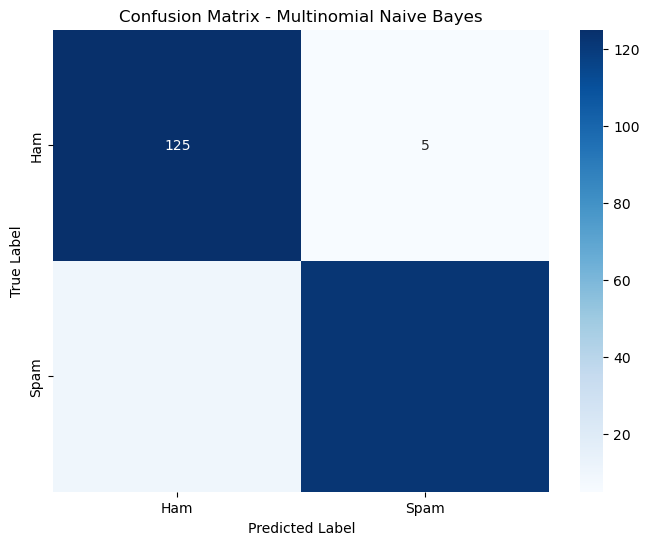

In [73]:
# Multinomial Naive Bayes (MNB)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

cm_mnb = confusion_matrix(y_test, y_pred_mnb)

print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_mnb)
print("Precision:", precision_score(y_test, y_pred_mnb))
print("Confusion Matrix:")
print(cm_mnb)

report_mnb = classification_report(y_test, y_pred_mnb)
print("\nClassification Report for Multinomial Naive Bayes:\n", report_mnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Bernoulli Naive Bayes:
Accuracy: 0.9389312977099237
Precision: 0.9915254237288136
Confusion Matrix:
[[129   1]
 [ 15 117]]

Classification Report for Bernoulli Naive Bayes:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       130
           1       0.99      0.89      0.94       132

    accuracy                           0.94       262
   macro avg       0.94      0.94      0.94       262
weighted avg       0.94      0.94      0.94       262



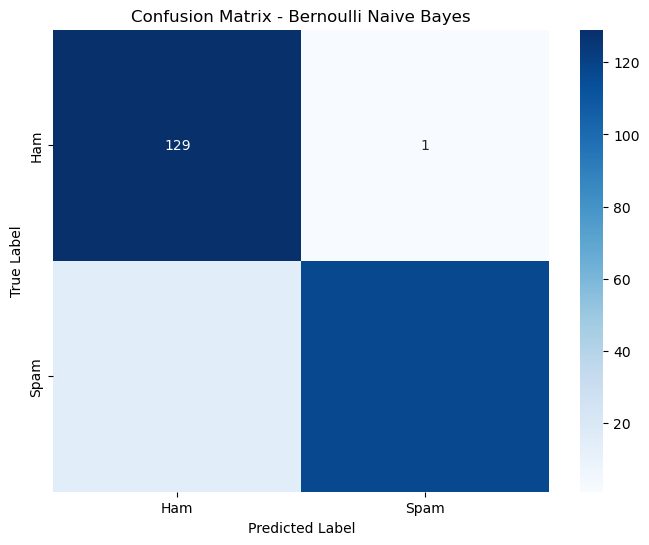

In [74]:
# Bernoulli Naive Bayes (BNB)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

cm_bnb = confusion_matrix(y_test, y_pred_bnb)

print("Bernoulli Naive Bayes:")
print("Accuracy:", accuracy_bnb)
print("Precision:", precision_score(y_test, y_pred_bnb))
print("Confusion Matrix:")
print(cm_bnb)

report_bnb = classification_report(y_test, y_pred_bnb)
print("\nClassification Report for Bernoulli Naive Bayes:\n", report_bnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

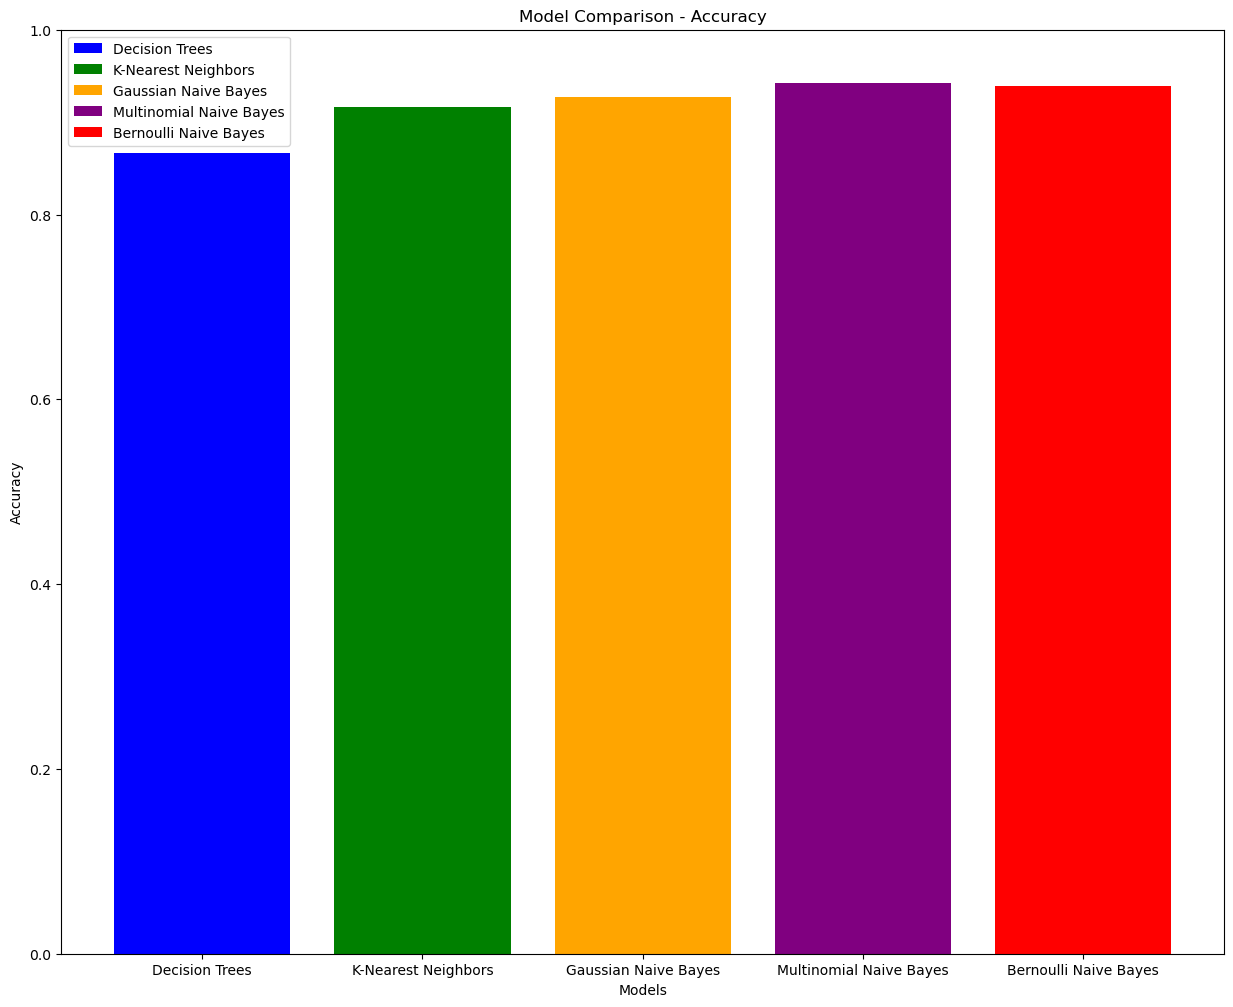

In [75]:
import matplotlib.pyplot as plt

# Assuming you have calculated accuracy for each model
accuracies = [accuracy_dt, accuracy_knn, accuracy_gnb, accuracy_mnb, accuracy_bnb]
models = ['Decision Trees', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes']
colors = ['blue', 'green', 'orange', 'purple', 'red']

plt.figure(figsize=(15, 12))

bars = plt.bar(models, accuracies, color=colors)

# Adding legend
plt.legend(bars, models, loc='upper left')

plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Set the y-axis limit to ensure proper visualization of accuracy values
plt.show()


Best Hyperparameters: {'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 5}

Best Decision Tree Model:
Accuracy: 0.8969465648854962
Precision: 0.9411764705882353
Confusion Matrix:
[[123   7]
 [ 20 112]]


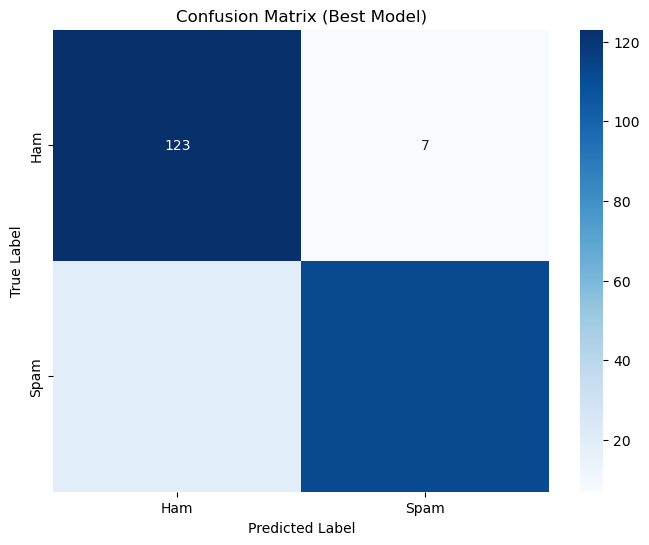

In [76]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid with 10 values for each hyperparameter
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# No need to use set_params, the best model is already fitted
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate the performance of the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)

# Print evaluation metrics for the best model
print("\nBest Decision Tree Model:")
print("Accuracy:", accuracy_best_dt)
print("Precision:", precision_best_dt)
print("Confusion Matrix:")
print(cm_best_dt)

# Visualize the confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

Best K-Nearest Neighbors Model:
Accuracy: 0.916030534351145
Precision: 0.9741379310344828
Confusion Matrix:
[[127   3]
 [ 19 113]]


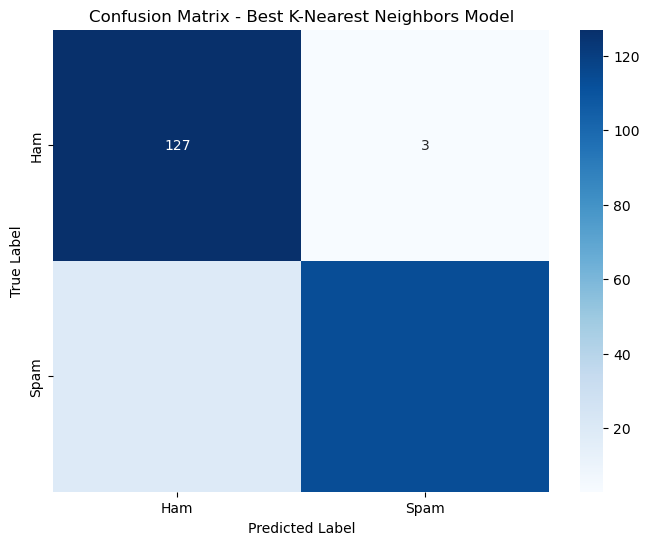

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# Define the hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Use GridSearchCV to find the best hyperparameters for KNN
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for KNN
best_knn_params = knn_grid_search.best_params_
print("Best Hyperparameters for K-Nearest Neighbors:", best_knn_params)

# Use the best KNN model for predictions
best_knn = knn_grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate the performance of the best KNN model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn = precision_score(y_test, y_pred_best_knn)
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn)

# Print evaluation metrics for the best KNN model
print("\nBest K-Nearest Neighbors Model:")
print("Accuracy:", accuracy_best_knn)
print("Precision:", precision_best_knn)
print("Confusion Matrix:")
print(cm_best_knn)

# Visualize the confusion matrix for the best KNN model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Best K-Nearest Neighbors Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Mean Accuracy: 0.7566893632683106
Parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
Mean Accuracy: 0.7566893632683106
Parameters: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Mean Accuracy: 0.7834652189915348
Parameters: {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Mean Accuracy: 0.7834652189915348
Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Mean Accuracy: 0.7059072506440929
Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean Accuracy: 0.7432738314317262
Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Mean Accuracy: 0.8811924917188074
Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Mean Accuracy: 0.8917326094957675
Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Mean Accuracy: 0.6647451232977548
Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Mean Accuracy: 0.7260397497239602
Parameters: {'n_neighbors': 5, 'p': 2, 'weigh

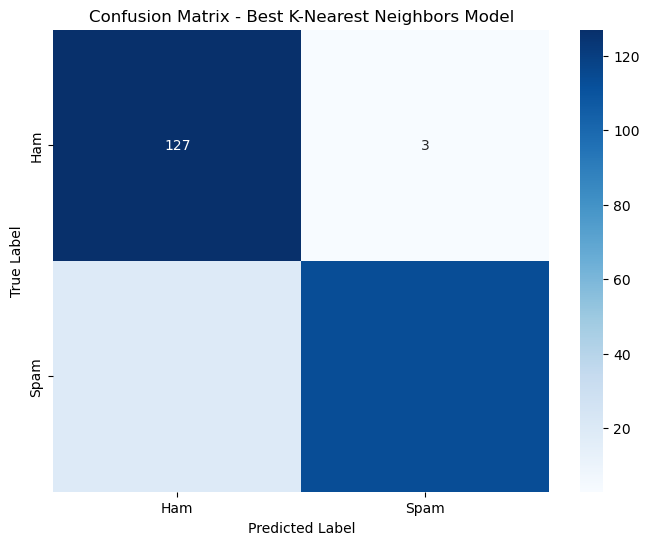

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# Define the hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Use GridSearchCV to find the best hyperparameters for KNN
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Print accuracy for each hyperparameter combination
results = pd.DataFrame(knn_grid_search.cv_results_)
for index, row in results.iterrows():
    print("Parameters:", row['params'])
    print("Mean Accuracy:", row['mean_test_score'])
    print("=====================================")

# Get the best hyperparameters for KNN
best_knn_params = knn_grid_search.best_params_
print("\nBest Hyperparameters for K-Nearest Neighbors:", best_knn_params)

# Use the best KNN model for predictions
best_knn = knn_grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate the performance of the best KNN model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn = precision_score(y_test, y_pred_best_knn)
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn)

# Print evaluation metrics for the best KNN model
print("\nBest K-Nearest Neighbors Model:")
print("Accuracy:", accuracy_best_knn)
print("Precision:", precision_best_knn)
print("Confusion Matrix:")
print(cm_best_knn)

# Visualize the confusion matrix for the best KNN model

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Best K-Nearest Neighbors Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your training data with 3390 features
# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier()

# Define the hyperparameter grid with 10 values for each hyperparameter
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print accuracy for each hyperparameter combination
results = pd.DataFrame(grid_search.cv_results_)
for index, row in results.iterrows():
    print("Parameters:", row['params'])
    print("Mean Accuracy:", row['mean_test_score'])
    print("=====================================")

# Get the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Create a new DecisionTreeClassifier instance with the best hyperparameters
best_dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                 min_samples_split=best_params['min_samples_split'], 
                                 min_samples_leaf=best_params['min_samples_leaf'])

# Train the best model with the full training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate the performance of the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)

# Print evaluation metrics for the best model
print("\nBest Decision Tree Model:")
print("Accuracy:", accuracy_best_dt)
print("Precision:", precision_best_dt)
print("Confusion Matrix:")
print(cm_best_dt)

# Visualize the confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Multinomial Naive Bayes (MNB)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

cm_mnb = confusion_matrix(y_test, y_pred_mnb)

print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_mnb)
print("Precision:", precision_score(y_test, y_pred_mnb))
print("Confusion Matrix:")
print(cm_mnb)

report_mnb = classification_report(y_test, y_pred_mnb)
print("\nClassification Report for Multinomial Naive Bayes:\n", report_mnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = [accuracy_mnb, accuracy_best_dt, accuracy_best_knn]

# Precision scores for each model
precision_scores = [precision_score(y_test, y_pred_mnb),
                    precision_best_dt,
                    precision_best_knn]

# Models' names
models = ['Multinomial Naive Bayes', 'Best Decision Tree', 'Best K-Nearest Neighbors']

# Bar graph for accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to better compare accuracies
plt.show()


In [ ]:
# Bar graph for precision
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Set the y-axis limit to better compare precision
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Function for text transformation
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Load the saved vectorizer for prediction
loaded_vectorizer = joblib.load('vectorizer.joblib')

# Assuming df_balanced is already defined and contains 'Revised Content' column
# Apply the same text transformation and vectorization
X_text = loaded_vectorizer.transform(df_balanced['Revised Content'])

# Decision Tree model
# Assuming best_dt was trained using the original vectorizer
# If not, you need to use the vectorizer that was used during training
prediction_dt = best_dt.predict(X_text)

# K-Nearest Neighbors model
prediction_knn = best_knn.predict(X_text)

# Multinomial Naive Bayes model
prediction_mnb = mnb.predict(X_text)

# Function to preprocess and predict
def predict_spam_or_ham(text):
    # Apply the same text transformation to the input text
    preprocessed_text = transform_text(text)

    # Transform the preprocessed text using the loaded vectorizer
    X_text = loaded_vectorizer.transform([preprocessed_text])

    # Use the Decision Tree model for prediction
    prediction_dt = best_dt.predict(X_text)[0]

    # Use the K-Nearest Neighbors model for prediction
    prediction_knn = best_knn.predict(X_text)[0]

    # Use the Multinomial Naive Bayes model for prediction
    prediction_mnb = mnb.predict(X_text)[0]

    # Return predictions
    return {
        'DecisionTree': 'Spam' if prediction_dt == 1 else 'Ham',
        'KNearestNeighbors': 'Spam' if prediction_knn == 1 else 'Ham',
        'MultinomialNaiveBayes': 'Spam' if prediction_mnb == 1 else 'Ham',
    }

# Example usage:
text_to_predict = "Check out this amazing offer! You've won a prize!"
predictions = predict_spam_or_ham(text_to_predict)

print("Text:", text_to_predict)
print("Predictions:")
for model, result in predictions.items():
    print(f"{model}: {result}")
